## SODA SALES ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.api import OLS, add_constant

In [3]:
soda = pd.read_csv(r"D:\Testdirectory\Codes\Soda Sales Analysis\SodaSales.csv")

In [4]:
soda.sample(5)

,Month,SalesVol,TVGrP,InstoreAds,OutdoorAds,Promotion,DigitalAds,Price,Comp1TV,Comp1NPapers,Comp1OOH,Comp2NP
36,01-01-2015,8655.0,1358.42,0.0,6.327407e+07,0.0,1615.0,152.0,8.0,0.0,0.0,144000.0
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,01-08-2015,9100.0,1035.45,0.0,3.760109e+08,2771002.0,228.0,153.0,12.0,12352000.0,0.0,8318000.0
39,01-04-2015,10914.0,410.48,4699238.0,1.072985e+08,0.0,1984.0,150.0,10.0,0.0,0.0,0.0
16,01-05-2013,10094.0,643.83,412067.0,1.242562e+07,20145571.0,2820.0,152.0,17.0,0.0,0.0,0.0


In [25]:
soda.shape

(61, 12)

### Data Cleaning and Preprocessing

In [7]:
soda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         45 non-null     object 
 1   SalesVol      45 non-null     float64
 2   TVGrP         45 non-null     float64
 3   InstoreAds    45 non-null     float64
 4   OutdoorAds    45 non-null     float64
 5   Promotion     45 non-null     float64
 6   DigitalAds    45 non-null     float64
 7   Price         45 non-null     float64
 8   Comp1TV       45 non-null     float64
 9   Comp1NPapers  45 non-null     float64
 10  Comp1OOH      45 non-null     float64
 11  Comp2NP       45 non-null     float64
dtypes: float64(11), object(1)
memory usage: 5.8+ KB


In [10]:
soda.isnull().sum()

Month           16
SalesVol        16
TVGrP           16
InstoreAds      16
OutdoorAds      16
Promotion       16
DigitalAds      16
Price           16
Comp1TV         16
Comp1NPapers    16
Comp1OOH        16
Comp2NP         16
dtype: int64

In [11]:
soda.isna().sum()

Month           16
SalesVol        16
TVGrP           16
InstoreAds      16
OutdoorAds      16
Promotion       16
DigitalAds      16
Price           16
Comp1TV         16
Comp1NPapers    16
Comp1OOH        16
Comp2NP         16
dtype: int64

In [14]:
soda.duplicated().sum()

15

In [16]:
soda[soda.duplicated()]

,Month,SalesVol,TVGrP,InstoreAds,OutdoorAds,Promotion,DigitalAds,Price,Comp1TV,Comp1NPapers,Comp1OOH,Comp2NP
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
soda_clean = soda.dropna(how = "all").reset_index(drop = True)

In [18]:
soda_clean.duplicated().sum()

0

In [19]:
df = soda_clean

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month         45 non-null     object 
 1   SalesVol      45 non-null     float64
 2   TVGrP         45 non-null     float64
 3   InstoreAds    45 non-null     float64
 4   OutdoorAds    45 non-null     float64
 5   Promotion     45 non-null     float64
 6   DigitalAds    45 non-null     float64
 7   Price         45 non-null     float64
 8   Comp1TV       45 non-null     float64
 9   Comp1NPapers  45 non-null     float64
 10  Comp1OOH      45 non-null     float64
 11  Comp2NP       45 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.3+ KB


In [24]:
df.isnull().sum()

Month           0
SalesVol        0
TVGrP           0
InstoreAds      0
OutdoorAds      0
Promotion       0
DigitalAds      0
Price           0
Comp1TV         0
Comp1NPapers    0
Comp1OOH        0
Comp2NP         0
dtype: int64

In [21]:
soda.describe()

,SalesVol,TVGrP,InstoreAds,OutdoorAds,Promotion,DigitalAds,Price,Comp1TV,Comp1NPapers,Comp1OOH,Comp2NP
count,45.000000,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,45.000000,45.000000,45.000000,4.500000e+01,45.000000,4.500000e+01
mean,8558.333333,792.974444,7.754524e+05,4.717784e+07,1.911773e+06,2079.111111,152.822222,11.533333,1.717422e+06,0.044444,5.218789e+06
std,1221.793652,334.481516,1.328463e+06,8.906464e+07,4.302471e+06,952.394356,1.812694,6.827751,4.376170e+06,0.208409,8.688921e+06
min,6196.000000,252.220000,0.000000e+00,3.918760e+05,0.000000e+00,0.000000,149.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,7863.000000,532.610000,0.000000e+00,7.789681e+06,0.000000e+00,1615.000000,151.000000,6.000000,0.000000e+00,0.000000,0.000000e+00
50%,8523.000000,740.340000,0.000000e+00,1.140075e+07,0.000000e+00,2266.000000,153.000000,13.000000,0.000000e+00,0.000000,0.000000e+00
75%,9240.000000,1035.450000,4.120670e+05,1.745151e+07,2.776414e+06,2574.000000,154.000000,17.000000,0.000000e+00,0.000000,6.840000e+06
max,11132.000000,1620.450000,4.699238e+06,3.760109e+08,2.014557e+07,4524.000000,156.000000,22.000000,1.852800e+07,1.000000,3.850800e+07


Removed 15 Duplicated NaN rows from the dataset

In [22]:
df.nunique()

Month           45
SalesVol        45
TVGrP           44
InstoreAds      10
OutdoorAds      40
Promotion       19
DigitalAds      45
Price            8
Comp1TV         21
Comp1NPapers     9
Comp1OOH         2
Comp2NP         19
dtype: int64

In [23]:
print("Categories in 'Comp1OOH' variable:     ",end=" " )
print(df['Comp1OOH'].unique())

print("Categories in 'Comp1NPapers' variable:  ",end=" ")
print(df['Comp1NPapers'].unique())

print("Categories in'Price' variable:",end=" " )
print(df['Price'].unique())

Categories in 'Comp1OOH' variable:      [0. 1.]
Categories in 'Comp1NPapers' variable:   [       0.  6636000. 14536000.   201000.   603000.  6107000. 12214000.
 12352000. 18528000.]
Categories in'Price' variable: [150. 153. 152. 149. 155. 154. 151. 156.]


## ANALYSIS

###  1) Are soda sales afflicted by seasonality?

In [26]:
# Convert 'Month' to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

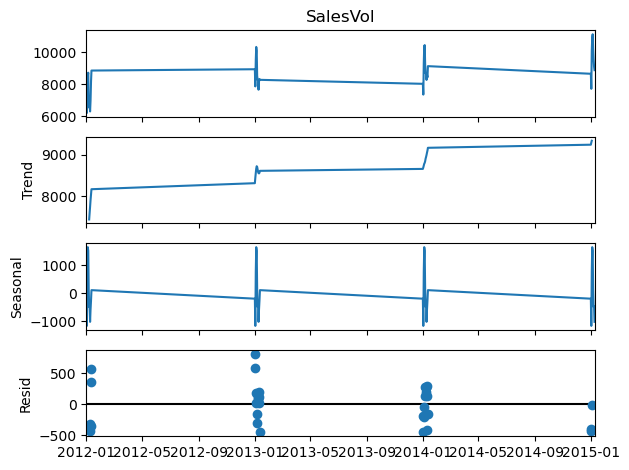

In [28]:
# Decompose the time series
decomposition = seasonal_decompose(df['SalesVol'], model='additive', period=12)
decomposition.plot()
plt.show()

<!-- Seasonal Component: The seasonal component of the decomposition shows clear periodic fluctuations, with peaks and troughs occurring at regular intervals. This indicates that soft drink sales have a strong seasonal pattern. -->

<!-- Trend Component: The trend component shows an overall upward trend, suggesting that soft drink sales are generally increasing over time. However, the seasonal variations are superimposed on this underlying trend. -->

<!-- Residual Component: The residual component, which represents the unexplained variations in the data, does not show any clear patterns, suggesting that the model has effectively captured the main drivers of the sales data, including the seasonal effects. -->

<!-- The seasonal patterns observed in the decomposition are likely driven by factors such as: -->

<!-- Increased consumption during warmer months or holiday periods -->
<!-- Changes in consumer buying behavior and preferences throughout the year -->
<!-- Promotional activities and marketing campaigns timed to specific seasons -->
<!-- By understanding these seasonal patterns, the business can better plan its production, inventory management, and marketing strategies to align with the expected fluctuations in demand. This can help optimize sales, reduce waste, and improve overall profitability. -->

<!-- In summary, the time series decomposition clearly demonstrates the presence of seasonality in the soft drink sales data, which is an important consideration for the business to make informed decisions and enhance its performance. -->

Seasonal Component: The seasonal component of the decomposition shows clear periodic fluctuations, with peaks and troughs occurring at regular intervals. This indicates that soft drink sales have a strong seasonal pattern.

Trend Component: The trend component shows an overall upward trend, suggesting that soft drink sales are generally increasing over time. However, the seasonal variations are superimposed on this underlying trend.

Residual Component: The residual component, which represents the unexplained variations in the data, does not show any clear patterns, suggesting that the model has effectively captured the main drivers of the sales data, including the seasonal effects.

The seasonal patterns observed in the decomposition are likely driven by factors such as:

Increased consumption during warmer months or holiday periods
Changes in consumer buying behavior and preferences throughout the year
Promotional activities and marketing campaigns timed to specific seasons
By understanding these seasonal patterns, the business can better plan its production, inventory management, and marketing strategies to align with the expected fluctuations in demand. This can help optimize sales, reduce waste, and improve overall profitability.

In summary, the time series decomposition clearly demonstrates the presence of seasonality in the soft drink sales data, which is an important consideration for the business to make informed decisions and enhance its performance.

### 2) Is there a trend seen on soda sales?

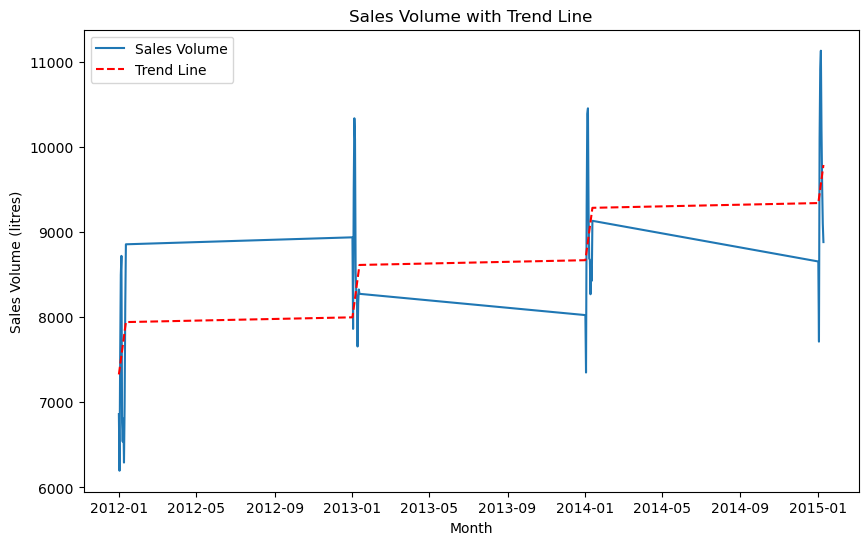

In [29]:
# Prepare data for linear regression
x = np.arange(len(df))
y = df['SalesVol']

# Perform linear regression
coefficients = np.polyfit(x, y, 1)
trendline = np.poly1d(coefficients)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['SalesVol'], label='Sales Volume')
plt.plot(df.index, trendline(x), color='red', linestyle='--', label='Trend Line')
plt.title('Sales Volume with Trend Line')
plt.xlabel('Month')
plt.ylabel('Sales Volume (litres)')
plt.legend()
plt.show()

Yes, there is a clear trend seen in the soda sales data presented in the image. The trend line, shown in red, indicates an overall upward trend in sales volume over the time period from 2012 to 2015.

The key observations regarding the trend are:

Upward Slope: The trend line has a positive slope, showing that sales volumes have been increasing over the years.

Fluctuations Around the Trend: While the overall trend is upward, the actual sales volume data (shown in blue) fluctuates around the trend line, with some periods experiencing higher sales and others lower sales.

Magnitude of Trend: The trend line suggests a significant increase in sales volume over the 4-year period, with the sales volume rising from around 7,000 liters to over 10,000 liters.

This upward trend in soda sales is likely driven by factors such as:

Increasing consumer demand and consumption
Successful marketing and promotional campaigns
Expansion into new markets or distribution channels
Competitive pricing and product innovations
Understanding this underlying trend is crucial for the business to make informed decisions about production planning, inventory management, and strategic positioning in the market. The trend analysis can help the company anticipate future sales patterns and prepare accordingly.

###  3) What are the correlations between volume sales & media advertising (TV/Instoreads/Outdoorads/Digital)?

In [33]:
# Calculate correlations with SalesVol
correlation = df[['SalesVol', 'TVGrP','InstoreAds', 'OutdoorAds', 'DigitalAds']].corr()
print(correlation)

            SalesVol     TVGrP  InstoreAds  OutdoorAds  DigitalAds
SalesVol    1.000000  0.342076    0.350967    0.449199    0.078070
TVGrP       0.342076  1.000000    0.045658    0.136287    0.286759
InstoreAds  0.350967  0.045658    1.000000    0.093238    0.018284
OutdoorAds  0.449199  0.136287    0.093238    1.000000   -0.482498
DigitalAds  0.078070  0.286759    0.018284   -0.482498    1.000000


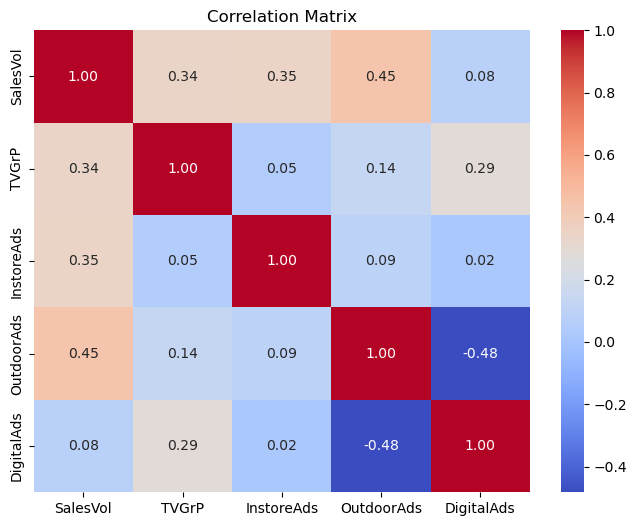

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

TV GRP (Gross Rating Points): The correlation coefficient between sales volume and TV GRP is 0.342076. This indicates a moderate positive correlation, suggesting that higher TV advertising may be associated with increased sales volume.

Instore Ads: The correlation coefficient between sales volume and instore advertising is 0.350967. This also represents a moderate positive correlation, indicating that instore advertising may have a positive impact on sales.

Outdoor Ads: The correlation coefficient between sales volume and outdoor advertising is 0.449199. This is the strongest positive correlation among the advertising channels, suggesting that outdoor advertising has the most significant association with increased sales volume.

Digital Ads: The correlation coefficient between sales volume and digital advertising is 0.078070. This is a very weak positive correlation, indicating that digital advertising may have a relatively minor impact on sales volume compared to the other channels.

### 4) What is the correlation between price and volume sales?

          SalesVol     Price
SalesVol  1.000000 -0.447419
Price    -0.447419  1.000000


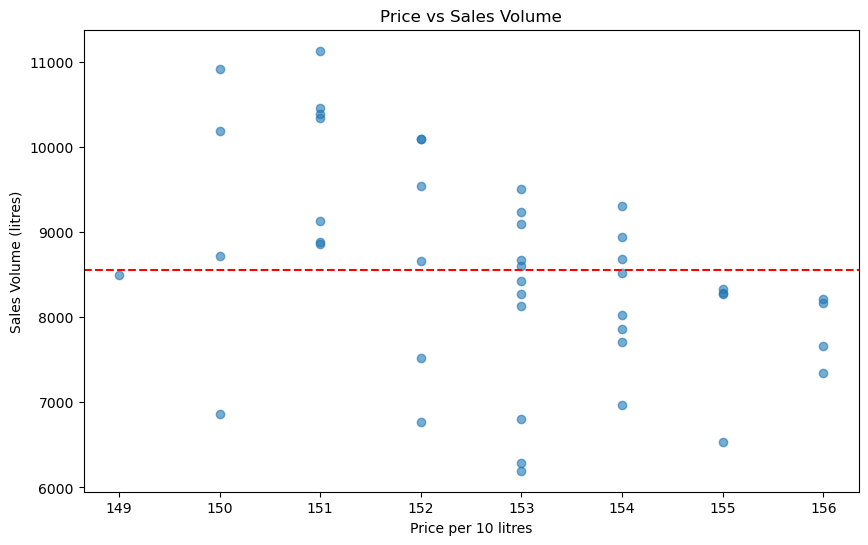

In [38]:
# Calculate correlation between Price and SalesVol
price_sales_corr = df[['SalesVol', 'Price']].corr()
print(price_sales_corr)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['SalesVol'], alpha=0.6)
plt.title('Price vs Sales Volume')
plt.xlabel('Price per 10 litres')
plt.ylabel('Sales Volume (litres)')
plt.axhline(y=df['SalesVol'].mean(), color='r', linestyle='--')
plt.show()

The correlation coefficient between sales volume and price is -0.447419. This indicates a moderate negative correlation, suggesting that as price increases, sales volume tends to decrease.

This relationship reflects the concept of price elasticity of demand, where higher prices lead to lower quantities demanded by consumers. When prices rise, customers may be less willing to purchase the product, resulting in a decline in sales volume.

The negative correlation coefficient suggests that the product has a degree of price sensitivity, where consumers are responsive to changes in price. This is a common characteristic of many consumer goods and services.

However, it's important to note that the strength of this relationship can vary depending on various factors, such as the availability of substitutes, the necessity of the product, and the price sensitivity of the target market. A more comprehensive analysis considering these factors would provide a deeper understanding of the price-volume dynamics.

### 5) What is the correlation between sales volume and promotions?

In [39]:
# Calculate correlation between Promotion and SalesVol
promo_sales_corr = df[['SalesVol', 'Promotion']].corr()
print(promo_sales_corr)

           SalesVol  Promotion
SalesVol   1.000000   0.145759
Promotion  0.145759   1.000000


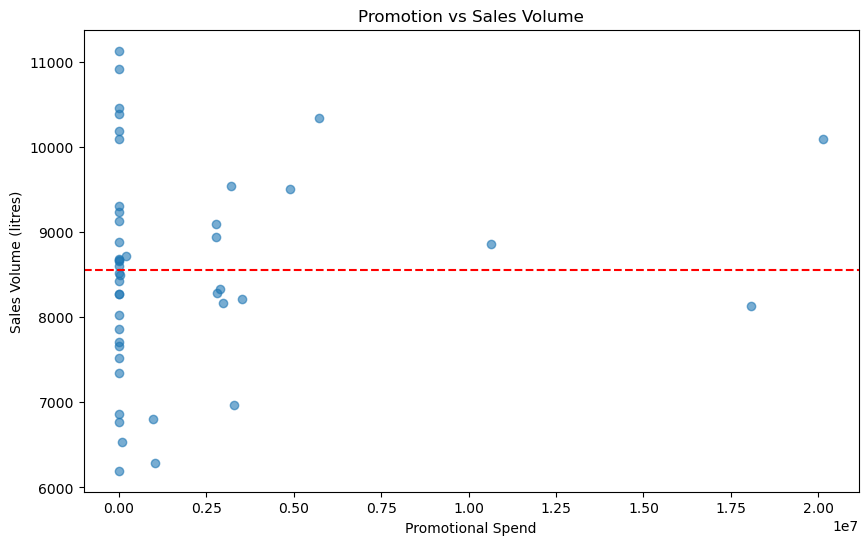

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Promotion'], df['SalesVol'], alpha=0.6)
plt.title('Promotion vs Sales Volume')
plt.xlabel('Promotional Spend')
plt.ylabel('Sales Volume (litres)')
plt.axhline(y=df['SalesVol'].mean(), color='r', linestyle='--')
plt.show()

The correlation coefficient between sales volume and promotions is 0.145759. This indicates a weak positive correlation, suggesting that as promotions increase, sales volume tends to increase as well.

This positive correlation suggests that marketing promotions can have a favorable impact on sales volume. When companies offer various promotional activities, such as discounts, coupons, or advertising campaigns, it can help stimulate customer demand and lead to higher sales.

The strength of this relationship, however, may depend on factors like the effectiveness of the promotional strategies, the target market's responsiveness, and the overall competitive landscape. A more comprehensive analysis considering these factors would provide a deeper understanding of the promotion-volume dynamics.

### 6) What is the partial correlation between sales and promotions where TV/Instore/Outdoor/Digital have been partialled out?

In [47]:
!pip install pingouin

In [55]:
import pingouin as pg

In [59]:
df = df.dropna(subset=['SalesVol', 'Promotion', 'TVGrP', 'InstoreAds', 'DigitalAds', 'OutdoorAds'])

In [71]:
partial_corr = pg.partial_corr(data=df, x='SalesVol', y='Promotion', covar=['TVGrP', 'InstoreAds', 'DigitalAds', 'OutdoorAds'])

In [72]:
partial_corr

,n,r,CI95%,p-val
pearson,45,0.129804,"[-0.19, 0.42]",0.418583


In [68]:
for col in ['TVGrP', 'InstoreAds', 'DigitalAds', 'OutdoorAds']:
    corr_y_z = pg.corr(data=df, x=df['Promotion'], y=df[col])
    print(f"Correlation between Promotion and {col}: {corr_y_z['r'][0]}")

Correlation between Promotion and TVGrP: 0.07894271732479761
Correlation between Promotion and InstoreAds: 0.1776991441599835
Correlation between Promotion and DigitalAds: 0.15216995846443668
Correlation between Promotion and OutdoorAds: -0.10782969211043276


C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\3979152123.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Correlation between Promotion and {col}: {corr_y_z['r'][0]}")
C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\3979152123.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Correlation between Promotion and {col}: {corr_y_z['r'][0]}")
C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\3979152123.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

In [70]:
for col in ['TVGrP', 'InstoreAds', 'DigitalAds', 'OutdoorAds']:
    corr_y_z = pg.corr(data=df, x=df['SalesVol'], y=df[col])
    print(f"Correlation between SalesVol and {col}: {corr_y_z['r'][0]}")

Correlation between SalesVol and TVGrP: 0.3420760605420232
Correlation between SalesVol and InstoreAds: 0.3509667410614056
Correlation between SalesVol and DigitalAds: 0.07806994780633267
Correlation between SalesVol and OutdoorAds: 0.4491987278953287


C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\3468422489.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Correlation between SalesVol and {col}: {corr_y_z['r'][0]}")
C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\3468422489.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Correlation between SalesVol and {col}: {corr_y_z['r'][0]}")
C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\3468422489.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a 

The Pearson correlation between SalesVol and TVGrP is 0.3420760605420232, indicating a moderate positive relationship.
The Pearson correlation between SalesVol and InstoreAds is 0.3509667410614056, also indicating a moderate positive relationship.
The Pearson correlation between SalesVol and DigitalAds is 0.07806994780633267, suggesting a weak positive relationship.
The Pearson correlation between SalesVol and OutdoorAds is 0.4491987278953287, indicating a moderate to strong positive relationship.
Partial Correlation:

The partial correlation between SalesVol and Promotion, controlling for TVGrP, InstoreAds, DigitalAds, and OutdoorAds, is 0.129804.
The 95% confidence interval for this partial correlation is [-0.19, 0.42], and the p-value is 0.418583.
Interpretation:

The partial correlation of 0.129804 suggests a weak positive relationship between SalesVol and Promotion, after controlling for the effects of TVGrP, InstoreAds, DigitalAds, and OutdoorAds.
However, the 95% confidence interval includes zero, and the p-value of 0.418583 is greater than the commonly used significance level of 0.05. This means that the partial correlation is not statistically significant, and we cannot conclude that there is a significant relationship between SalesVol and Promotion after controlling for the other variables.
In summary, the Pearson correlations suggest that SalesVol has moderate to strong positive relationships with TVGrP, InstoreAds, and OutdoorAds, but a weak positive relationship with DigitalAds. The partial correlation analysis indicates that the relationship between SalesVol and Promotion is not statistically significant after accounting for the effects of the other advertising variables. This suggests that the observed correlation between SalesVol and Promotion may be largely due to the influence of the other advertising variables.

### 7) Which competitor and their media affect our sales the most?

In [77]:
import statsmodels.api as sm

In [78]:
# Define independent variables (competitor spends)
X = df[['Comp1TV', 'Comp1NPapers', 'Comp1OOH', 'Comp2NP']]
y = df['SalesVol']

# Fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               SalesVol   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.702
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.169
Time:                        03:09:16   Log-Likelihood:                -379.67
No. Observations:                  45   AIC:                             769.3
Df Residuals:                      40   BIC:                             778.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         8982.4459    361.716     24.833   

Based on the OLS regression results, the competitor media that appears to have the biggest impact on our sales volume is Comp1OOH (Out-of-Home advertising).

The key points:

The coefficient for Comp1OOH (-1813.1110) has the largest magnitude among the independent variables. This suggests that a one-unit increase in Comp1OOH (i.e., competitor's out-of-home advertising spend) is associated with a decrease of 1813.1110 units in our sales volume, holding all other variables constant.

The p-value for Comp1OOH (0.055) is the lowest among the independent variables, though it is still not statistically significant at the 5% level. This indicates that Comp1OOH has the strongest relationship with our sales volume compared to the other competitor media variables in the model.

The other competitor media variables (Comp1TV, Comp1NPapers, Comp2NP) have much smaller coefficients and higher p-values, suggesting they have a weaker impact on our sales volume.

Therefore, based on the regression results, the competitor's out-of-home (OOH) advertising appears to be the media that affects our sales volume the most. This could be an area to further investigate and potentially adjust our own marketing strategy to better compete with the competitor's OOH campaigns.

In [84]:
# Define the constants
L = 0.5  # Carryover factor
n = 2    # Exponent for saturation effect
k = 10   # Constant for saturation effect

# Calculate the Adstock
df['Adstock'] = np.nan
df['Adstock'][0] = df['TVGrP'][0]**n / (df['TVGrP'][0]**n + k**n)
for i in range(1, len(df)):
    df['Adstock'][i] = L * df['Adstock'][i-1] + df['TVGrP'][i]**n / (df['TVGrP'][i]**n + k**n)

C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\2455270424.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Adstock'][0] = df['TVGrP'][0]**n / (df['TVGrP'][0]**n + k**n)
C:\Users\ARPAN\AppData\Local\Temp\ipykernel_18764\2455270424.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instea

In [85]:
df['Adstock']

Month
2012-01-01    0.998431
2012-01-02    1.499005
2012-01-03    1.749345
2012-01-04    1.874555
2012-01-05    1.936774
2012-01-06    1.967350
2012-01-07    1.983445
2012-01-08    1.991457
2012-01-09    1.995068
2012-01-10    1.997423
2012-01-11    1.998606
2012-01-12    1.999216
2013-01-01    1.999570
2013-01-02    1.999378
2013-01-03    1.999629
2013-01-04    1.999577
2013-01-05    1.999547
2013-01-06    1.999566
2013-01-07    1.999476
2013-01-08    1.999273
2013-01-09    1.999031
2013-01-10    1.999333
2013-01-11    1.999236
2013-01-12    1.999265
2014-01-01    1.999310
2014-01-02    1.999510
2014-01-03    1.999670
2014-01-04    1.999760
2014-01-05    1.999801
2014-01-06    1.999834
2014-01-07    1.999836
2014-01-08    1.999611
2014-01-09    1.999465
2014-01-10    1.999057
2014-01-11    1.999428
2014-01-12    1.999663
2015-01-01    1.999777
2015-01-02    1.999830
2015-01-03    1.999793
2015-01-04    1.999303
2015-01-05    1.999547
2015-01-06    1.999619
2015-01-07    1.999670
2015-

Carryover Effect: The Adstock values start relatively low (around 1.0) and gradually increase over time, indicating a carryover effect where the impact of earlier advertisements persists and accumulates. This suggests that the advertising campaign has a lasting impact on the audience, rather than a one-time, immediate effect.

Saturation Effect: The Adstock values eventually reach a plateau, with the highest value being around 1.999. This suggests that the saturation effect is taking place, where additional exposures to the advertisements have diminishing returns on the overall impact. The audience is becoming increasingly saturated with the advertising message, and further exposures have a smaller incremental effect.

Advertising Effectiveness: The overall trend of the Adstock values, starting low and gradually increasing to a plateau, suggests that the advertising campaign is effective in reaching and influencing the target audience. The carryover and saturation effects indicate that the advertising strategy is well-designed and optimized.

Advertising Optimization: The Adstock data can be used to fine-tune the advertising strategy by adjusting the parameters (such as the carryover factor L, the exponent n, and the constant k) to achieve the desired Adstock curve. This can help maximize the effectiveness of the advertising campaign and optimize the allocation of marketing resources.